# Libraries


In [3]:
#@title
from skimage.morphology import thin, skeletonize
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import time
from PIL import Image
from matplotlib import cm
from PIL import Image

# v1.1



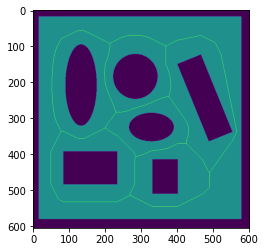

In [ ]:
world = rgb2gray(cv2.imread('world1.png'))
thresh = threshold_otsu(world)
world = world > thresh
world = 1 - world
thinned = thin(world)
skel = skeletonize(world)
plt.imshow(thinned+world)

In [ ]:
thinned

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
thinned.shape[1]

602

# World 2

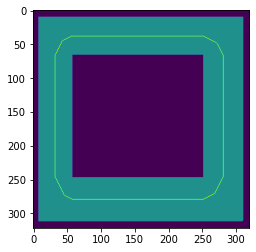

In [ ]:
world = rgb2gray(cv2.imread('world2.png'))
thresh = threshold_otsu(world)
world = world > thresh
world = 1 - world
thinned = thin(world)
skel = skeletonize(world)
plt.imshow(thinned+world)

In [ ]:
waypoints = [];
waypointsR = [];
waypointsC = [];
for i in range(thinned.shape[0]-1):
  for j in range(thinned.shape[1]-1):
    if thinned[i,j] == True:
      waypoints.append([i,j])
      waypointsR.append(i);
      waypointsC.append(j);


In [ ]:
len(waypoints)

899

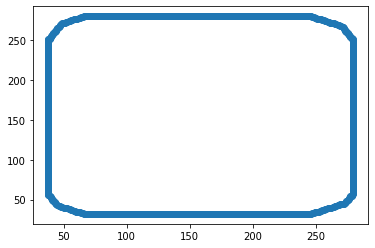

In [ ]:
plt.scatter(waypointsR,waypointsC)

In [ ]:
start = waypoints[0]
Currentloc = []
tree = {}
for i in range(len(waypoints)):
  x = waypoints[i][0]
  y = waypoints[i][1]
  neighbours = []
  for j in range(len(waypoints)):
    x_new = waypoints[j][0]
    y_new = waypoints[j][1]
    #              left                        right                 
    if ((x == x_new + 1) and (y == y_new)) or ((x == x_new -1) and (y == y_new)) or ((x == x_new) and (y == y_new +1)) or ((x == x_new) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new+1)) or ((x == x_new - 1) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new-1)) or ((x == x_new - 1) and (y == y_new + 1)):
      neighbours.append(waypoints[j])
      #print(neighbours)
  tree[str(waypoints[i])]  = neighbours



In [ ]:
tree

{'[100, 280]': [[99, 280], [101, 280]],
 '[100, 32]': [[99, 32], [101, 32]],
 '[101, 280]': [[100, 280], [102, 280]],
 '[101, 32]': [[100, 32], [102, 32]],
 '[102, 280]': [[101, 280], [103, 280]],
 '[102, 32]': [[101, 32], [103, 32]],
 '[103, 280]': [[102, 280], [104, 280]],
 '[103, 32]': [[102, 32], [104, 32]],
 '[104, 280]': [[103, 280], [105, 280]],
 '[104, 32]': [[103, 32], [105, 32]],
 '[105, 280]': [[104, 280], [106, 280]],
 '[105, 32]': [[104, 32], [106, 32]],
 '[106, 280]': [[105, 280], [107, 280]],
 '[106, 32]': [[105, 32], [107, 32]],
 '[107, 280]': [[106, 280], [108, 280]],
 '[107, 32]': [[106, 32], [108, 32]],
 '[108, 280]': [[107, 280], [109, 280]],
 '[108, 32]': [[107, 32], [109, 32]],
 '[109, 280]': [[108, 280], [110, 280]],
 '[109, 32]': [[108, 32], [110, 32]],
 '[110, 280]': [[109, 280], [111, 280]],
 '[110, 32]': [[109, 32], [111, 32]],
 '[111, 280]': [[110, 280], [112, 280]],
 '[111, 32]': [[110, 32], [112, 32]],
 '[112, 280]': [[111, 280], [113, 280]],
 '[112, 32]':

In [ ]:
start = waypoints[0]
next = tree[str(start)][0]
prev = start
seen = [prev, next]

  

In [ ]:
seen

[[38, 56], [38, 57]]

In [ ]:
len(waypoints)

899

In [ ]:
start = waypoints[0]
next = tree[str(start)][0]
prev = start
seen = [prev, next]
while 1==1:
  if not(tree[str(next)][0] in seen):
    next = tree[str(next)][0]
  elif not(tree[str(next)][1] in seen):
    next = tree[str(next)][1]
  else:
    break
  seen.append(next)
print(len(seen))

899


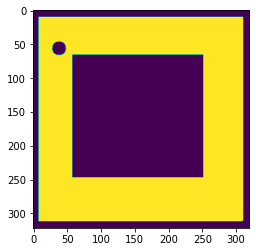

In [ ]:
image = cv2.UMat.get(cv2.circle(world, (start[0],start[1]), radius=10,color=(0, 0, 255), thickness=-1))
plt.imshow(image)

In [ ]:
seen[1][0]

38

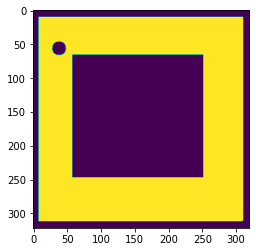

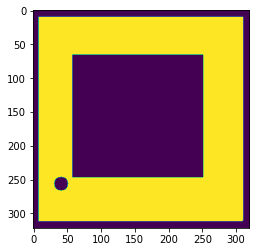

In [ ]:
image = cv2.UMat.get(cv2.circle(world, (seen[0][0],seen[0][1]), radius=10,color=(0, 0, 255), thickness=-1))
plt.figure()
plt.imshow(image)
plt.show()
time.sleep(1)
image = cv2.UMat.get(cv2.circle(world, (seen[200][0],seen[200][1]), radius=10,color=(0, 0, 255), thickness=-1))
plt.figure().clear()
plt.imshow(image)
plt.show()

In [ ]:
len(seen)

899

In [ ]:
image.shape

(322, 320)

In [ ]:
plt.figure()
video = []
for i in range(0,len(seen),10):
  image = cv2.UMat.get(cv2.circle(world, (seen[i][0],seen[i][1]), radius=10,color=(0, 0, 255), thickness=-1))
  plt.imshow(image,cmap='gray')
  #plt.show()
  plt.imsave('sample_data/'+str(i)+'.png',image,cmap='gray')
  plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
!zip -r /content/sample_data.zip /content/sample_data

  adding: content/sample_data/ (stored 0%)
  adding: content/sample_data/README.md (deflated 42%)
  adding: content/sample_data/anscombe.json (deflated 83%)
  adding: content/sample_data/140.png (deflated 68%)
  adding: content/sample_data/360.png (deflated 70%)
  adding: content/sample_data/130.png (deflated 68%)
  adding: content/sample_data/520.png (deflated 69%)
  adding: content/sample_data/670.png (deflated 69%)
  adding: content/sample_data/860.png (deflated 68%)
  adding: content/sample_data/780.png (deflated 70%)
  adding: content/sample_data/840.png (deflated 70%)
  adding: content/sample_data/110.png (deflated 68%)
  adding: content/sample_data/540.png (deflated 68%)
  adding: content/sample_data/0.png (deflated 69%)
  adding: content/sample_data/680.png (deflated 70%)
  adding: content/sample_data/820.png (deflated 69%)
  adding: content/sample_data/690.png (deflated 70%)
  adding: content/sample_data/90.png (deflated 68%)
  adding: content/sample_data/880.png (deflated 67%

# World 2

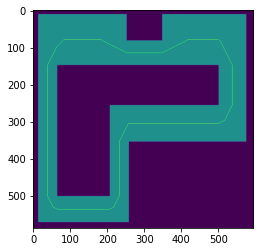

In [ ]:
world = rgb2gray(cv2.imread('world5.png'))
thresh = threshold_otsu(world)
world = world > thresh
world = 1 - world
thinned = thin(world)
skel = skeletonize(world)
plt.imshow(thinned+world)

In [ ]:
waypoints = [];
waypointsR = [];
waypointsC = [];
for i in range(thinned.shape[0]):
  for j in range(thinned.shape[1]):
    if thinned[i,j] == True:
      waypoints.append([j,thinned.shape[0]-i])
      waypointsR.append(j);
      waypointsC.append(thinned.shape[0]-i);


In [ ]:
len(waypoints)

1732

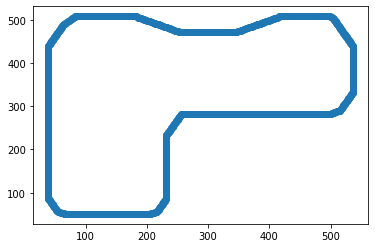

In [ ]:
plt.scatter(waypointsR,waypointsC)

In [ ]:
start = waypoints[0]
Currentloc = []
tree = {}
for i in range(len(waypoints)):
  x = waypoints[i][0]
  y = waypoints[i][1]
  neighbours = []
  for j in range(len(waypoints)):
    x_new = waypoints[j][0]
    y_new = waypoints[j][1]
    #              left                        right                 
    if ((x == x_new + 1) and (y == y_new)) or ((x == x_new -1) and (y == y_new)) or ((x == x_new) and (y == y_new +1)) or ((x == x_new) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new+1)) or ((x == x_new - 1) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new-1)) or ((x == x_new - 1) and (y == y_new + 1)):
      neighbours.append(waypoints[j])
      #print(neighbours)
  tree[str(waypoints[i])]  = neighbours



In [ ]:
tree

{'[83, 508]': [[84, 508], [82, 507]],
 '[84, 508]': [[83, 508], [85, 508]],
 '[85, 508]': [[84, 508], [86, 508]],
 '[86, 508]': [[85, 508], [87, 508]],
 '[87, 508]': [[86, 508], [88, 508]],
 '[88, 508]': [[87, 508], [89, 508]],
 '[89, 508]': [[88, 508], [90, 508]],
 '[90, 508]': [[89, 508], [91, 508]],
 '[91, 508]': [[90, 508], [92, 508]],
 '[92, 508]': [[91, 508], [93, 508]],
 '[93, 508]': [[92, 508], [94, 508]],
 '[94, 508]': [[93, 508], [95, 508]],
 '[95, 508]': [[94, 508], [96, 508]],
 '[96, 508]': [[95, 508], [97, 508]],
 '[97, 508]': [[96, 508], [98, 508]],
 '[98, 508]': [[97, 508], [99, 508]],
 '[99, 508]': [[98, 508], [100, 508]],
 '[100, 508]': [[99, 508], [101, 508]],
 '[101, 508]': [[100, 508], [102, 508]],
 '[102, 508]': [[101, 508], [103, 508]],
 '[103, 508]': [[102, 508], [104, 508]],
 '[104, 508]': [[103, 508], [105, 508]],
 '[105, 508]': [[104, 508], [106, 508]],
 '[106, 508]': [[105, 508], [107, 508]],
 '[107, 508]': [[106, 508], [108, 508]],
 '[108, 508]': [[107, 508]

In [ ]:
start = waypoints[0]
next = tree[str(start)][0]
prev = start
seen = [prev, next]
while 1==1:
  if not(tree[str(next)][0] in seen):
    next = tree[str(next)][0]
  elif not(tree[str(next)][1] in seen):
    next = tree[str(next)][1]
  else:
    break
  seen.append(next)
print(len(seen))

1732


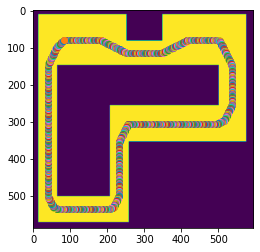

In [ ]:
#image = cv2.UMat.get(cv2.circle(world, (thinned.shape[0]-start[1],start[0]), radius=20,color=(0, 0, 255), thickness=-1))
plt.imshow(world)
for i in range(len(seen)):
  plt.scatter(seen[i][0],-seen[i][1]+thinned.shape[0])
plt.show() 

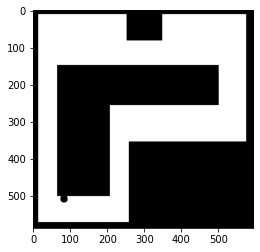

In [ ]:
image = cv2.UMat.get(cv2.circle(world, (start[0],start[1]), radius=10,color=(0, 0, 255), thickness=-1))
plt.imshow(image,cmap='gray')

In [ ]:
plt.figure()
video = []
for i in range(0,len(seen),10):
  image = cv2.UMat.get(cv2.circle(world, (seen[i][0],-seen[i][1]+thinned.shape[0]), radius=10,color=(0, 0, 255), thickness=-1))
  plt.imshow(image,cmap='gray')
  #plt.show()
  plt.imsave('/content/sample_data/triangle/'+str(i)+'.png',image,cmap='gray')
  plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
!zip -r /content/triangle.zip /content/sample_data/triangle

updating: content/sample_data/triangle/ (stored 0%)
updating: content/sample_data/triangle/1090.png (deflated 83%)
updating: content/sample_data/triangle/140.png (deflated 83%)
updating: content/sample_data/triangle/360.png (deflated 83%)
updating: content/sample_data/triangle/1360.png (deflated 82%)
updating: content/sample_data/triangle/1120.png (deflated 82%)
updating: content/sample_data/triangle/980.png (deflated 83%)
updating: content/sample_data/triangle/1290.png (deflated 81%)
updating: content/sample_data/triangle/1160.png (deflated 82%)
updating: content/sample_data/triangle/1170.png (deflated 82%)
updating: content/sample_data/triangle/1220.png (deflated 83%)
updating: content/sample_data/triangle/130.png (deflated 83%)
updating: content/sample_data/triangle/1010.png (deflated 83%)
updating: content/sample_data/triangle/520.png (deflated 82%)
updating: content/sample_data/triangle/670.png (deflated 83%)
updating: content/sample_data/triangle/860.png (deflated 82%)
updating: 

# Triangle


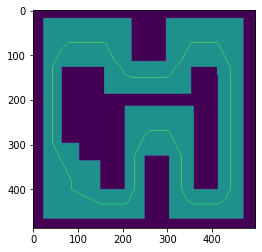

In [ ]:
world = rgb2gray(cv2.imread('world8.png'))
thresh = threshold_otsu(world)
world = world > thresh
world = 1 - world
thinned = thin(world)
skel = skeletonize(world)
plt.imshow(thinned+world)

In [ ]:
waypoints = [];
waypointsR = [];
waypointsC = [];
for i in range(thinned.shape[0]):
  for j in range(thinned.shape[1]):
    if thinned[i,j] == True:
      waypoints.append([j,thinned.shape[0]-i])
      waypointsR.append(j);
      waypointsC.append(thinned.shape[0]-i);


In [ ]:
len(waypoints)

1633

In [ ]:
plt.scatter(waypointsR,waypointsC)

In [ ]:
start = waypoints[0]
Currentloc = []
tree = {}
for i in range(len(waypoints)):
  x = waypoints[i][0]
  y = waypoints[i][1]
  neighbours = []
  for j in range(len(waypoints)):
    x_new = waypoints[j][0]
    y_new = waypoints[j][1]
    #              left                        right                 
    if ((x == x_new + 1) and (y == y_new)) or ((x == x_new -1) and (y == y_new)) or ((x == x_new) and (y == y_new +1)) or ((x == x_new) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new+1)) or ((x == x_new - 1) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new-1)) or ((x == x_new - 1) and (y == y_new + 1)):
      neighbours.append(waypoints[j])
      #print(neighbours)
  tree[str(waypoints[i])]  = neighbours



In [ ]:
tree

{'[78, 415]': [[79, 415], [77, 414]],
 '[79, 415]': [[78, 415], [80, 415]],
 '[80, 415]': [[79, 415], [81, 415]],
 '[81, 415]': [[80, 415], [82, 415]],
 '[82, 415]': [[81, 415], [83, 415]],
 '[83, 415]': [[82, 415], [84, 415]],
 '[84, 415]': [[83, 415], [85, 415]],
 '[85, 415]': [[84, 415], [86, 415]],
 '[86, 415]': [[85, 415], [87, 415]],
 '[87, 415]': [[86, 415], [88, 415]],
 '[88, 415]': [[87, 415], [89, 415]],
 '[89, 415]': [[88, 415], [90, 415]],
 '[90, 415]': [[89, 415], [91, 415]],
 '[91, 415]': [[90, 415], [92, 415]],
 '[92, 415]': [[91, 415], [93, 415]],
 '[93, 415]': [[92, 415], [94, 415]],
 '[94, 415]': [[93, 415], [95, 415]],
 '[95, 415]': [[94, 415], [96, 415]],
 '[96, 415]': [[95, 415], [97, 415]],
 '[97, 415]': [[96, 415], [98, 415]],
 '[98, 415]': [[97, 415], [99, 415]],
 '[99, 415]': [[98, 415], [100, 415]],
 '[100, 415]': [[99, 415], [101, 415]],
 '[101, 415]': [[100, 415], [102, 415]],
 '[102, 415]': [[101, 415], [103, 415]],
 '[103, 415]': [[102, 415], [104, 415]],


In [ ]:
start = waypoints[0]
next = tree[str(start)][0]
prev = start
seen = [prev, next]
while 1==1:
  if not(tree[str(next)][0] in seen):
    next = tree[str(next)][0]
  elif not(tree[str(next)][1] in seen):
    next = tree[str(next)][1]
  else:
    break
  seen.append(next)
print(len(seen))

1633


KeyboardInterrupt: ignored

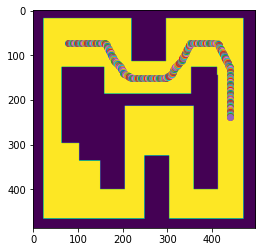

In [ ]:
#image = cv2.UMat.get(cv2.circle(world, (thinned.shape[0]-start[1],start[0]), radius=20,color=(0, 0, 255), thickness=-1))
plt.imshow(world)
for i in range(len(seen)):
  plt.scatter(seen[i][0],-seen[i][1]+thinned.shape[0])
plt.show() 

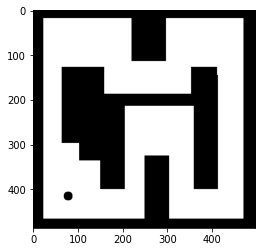

In [ ]:
image = cv2.UMat.get(cv2.circle(world, (start[0],start[1]), radius=10,color=(0, 0, 255), thickness=-1))
plt.imshow(image,cmap='gray')

FileNotFoundError: ignored

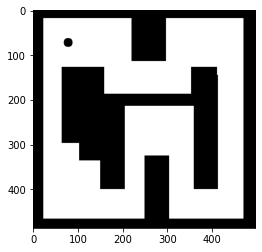

In [ ]:
plt.figure()
video = []
for i in range(0,len(seen),10):
  image = cv2.UMat.get(cv2.circle(world, (seen[i][0],-seen[i][1]+thinned.shape[0]), radius=10,color=(0, 0, 255), thickness=-1))
  plt.imshow(image,cmap='gray')
  #plt.show()
  plt.imsave('/content/triangle/'+str(i)+'.png',image,cmap='gray')
  plt.clf()

In [ ]:
!zip -r /content/triangle.zip /content/triangle

# ShortestPath

**Create Tree**

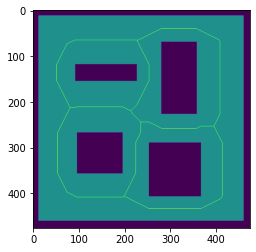

In [17]:
world = rgb2gray(cv2.imread('world10.png'))
thresh = threshold_otsu(world)
world = world > thresh
world = 1 - world
thinned = thin(world)
#skel = skeletonize(world)
plt.imshow(thinned+world)

waypoints = [];
waypointsR = [];
waypointsC = [];
for i in range(thinned.shape[0]):
  for j in range(thinned.shape[1]):
    if thinned[i,j] == True:
      waypoints.append([j,thinned.shape[0]-i])
      waypointsR.append(j);
      waypointsC.append(thinned.shape[0]-i);

start = waypoints[0]
Currentloc = []
tree = {}
for i in range(len(waypoints)):
  x = waypoints[i][0]
  y = waypoints[i][1]
  neighbours = []
  for j in range(len(waypoints)):
    x_new = waypoints[j][0]
    y_new = waypoints[j][1]
    #              left                        right                 
    if ((x == x_new + 1) and (y == y_new)) or ((x == x_new -1) and (y == y_new)) or ((x == x_new) and (y == y_new +1)) or ((x == x_new) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new+1)) or ((x == x_new - 1) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new-1)) or ((x == x_new - 1) and (y == y_new + 1)):
      neighbours.append(str(waypoints[j]))
      #print(neighbours)
  tree[str(waypoints[i])]  = neighbours

In [ ]:
tree

**Select a starting point on bottom left corer and end point on top right**

In [18]:
smallest = []
largest = []
for i in waypoints:
  if i[0] < 90 and i[1] < 100:
    smallest.append(i)
  if i[0] > 400 and i[1] > 400:
    largest.append(i)

startPoint = smallest[0]
endPoint = largest[0]


In [19]:
startPoint,endPoint

([64, 99], [401, 414])

**BFS Shortest Path**


In [20]:
def BFS_SP(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            neighbours = graph[node]
             
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return new_path
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    print("So sorry, but a connecting"\
                "path doesn't exist :(")
    return

In [21]:
a = BFS_SP(tree, str(startPoint), str(endPoint))
b = [i[1:-1] for i in a]
b = [[int(i.split(", ")[0]) ,int(i.split(", ")[1])] for i in b]
waypointsFinal = b

Shortest path =  [64, 99] [63, 100] [63, 101] [62, 102] [62, 103] [61, 104] [61, 105] [60, 106] [60, 107] [59, 108] [59, 109] [58, 110] [58, 111] [57, 112] [57, 113] [56, 114] [56, 115] [55, 116] [55, 117] [54, 118] [54, 119] [53, 120] [53, 121] [53, 122] [53, 123] [53, 124] [53, 125] [53, 126] [53, 127] [53, 128] [53, 129] [53, 130] [53, 131] [53, 132] [53, 133] [53, 134] [53, 135] [53, 136] [53, 137] [53, 138] [53, 139] [53, 140] [53, 141] [53, 142] [53, 143] [53, 144] [53, 145] [53, 146] [53, 147] [53, 148] [53, 149] [53, 150] [53, 151] [53, 152] [53, 153] [53, 154] [53, 155] [53, 156] [53, 157] [53, 158] [53, 159] [53, 160] [53, 161] [53, 162] [53, 163] [53, 164] [53, 165] [53, 166] [53, 167] [53, 168] [53, 169] [53, 170] [53, 171] [53, 172] [53, 173] [53, 174] [53, 175] [53, 176] [53, 177] [53, 178] [53, 179] [53, 180] [53, 181] [53, 182] [53, 183] [53, 184] [53, 185] [53, 186] [53, 187] [53, 188] [53, 189] [53, 190] [53, 191] [53, 192] [53, 193] [53, 194] [53, 195] [53, 196] [53,

In [22]:
len(waypointsFinal)

625

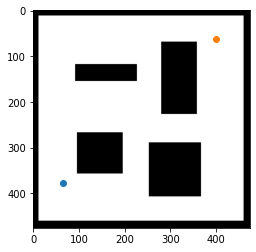

In [25]:
plt.imshow(world,cmap='gray')
plt.scatter(startPoint[0],-startPoint[1]+thinned.shape[0])
plt.scatter(endPoint[0],-endPoint[1]+thinned.shape[0])
plt.show() 

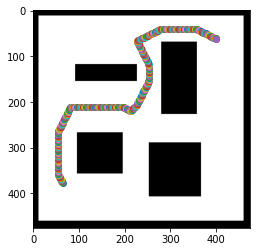

In [23]:
#image = cv2.UMat.get(cv2.circle(world, (thinned.shape[0]-start[1],start[0]), radius=20,color=(0, 0, 255), thickness=-1))
plt.imshow(world,cmap='gray')
for i in range(len(waypointsFinal)):
  plt.scatter(waypointsFinal[i][0],-waypointsFinal[i][1]+thinned.shape[0])
plt.show() 

In [ ]:
plt.figure()
video = []
for i in range(0,len(waypointsFinal),10):
  image = cv2.UMat.get(cv2.circle(world, (waypointsFinal[i][0],-waypointsFinal[i][1]+thinned.shape[0]), radius=10,color=(0, 0, 255), thickness=-1))
  plt.imshow(image,cmap='gray')
  #plt.show()
  plt.imsave('/content/maze1/'+str(i)+'.png',image,cmap='gray')
  plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
!zip -r /content/maze1.zip /content/maze1

  adding: content/maze1/ (stored 0%)
  adding: content/maze1/440.png (deflated 76%)
  adding: content/maze1/110.png (deflated 74%)
  adding: content/maze1/590.png (deflated 76%)
  adding: content/maze1/580.png (deflated 76%)
  adding: content/maze1/170.png (deflated 75%)
  adding: content/maze1/200.png (deflated 75%)
  adding: content/maze1/80.png (deflated 75%)
  adding: content/maze1/550.png (deflated 76%)
  adding: content/maze1/280.png (deflated 76%)
  adding: content/maze1/180.png (deflated 76%)
  adding: content/maze1/20.png (deflated 75%)
  adding: content/maze1/150.png (deflated 75%)
  adding: content/maze1/490.png (deflated 76%)
  adding: content/maze1/350.png (deflated 76%)
  adding: content/maze1/530.png (deflated 76%)
  adding: content/maze1/240.png (deflated 76%)
  adding: content/maze1/620.png (deflated 77%)
  adding: content/maze1/520.png (deflated 75%)
  adding: content/maze1/470.png (deflated 76%)
  adding: content/maze1/570.png (deflated 76%)
  adding: content/maze1/3

# MazeReal

**Create Tree**

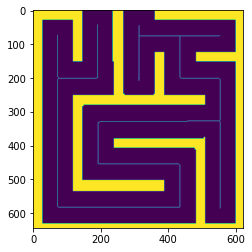

In [26]:
world = rgb2gray(cv2.imread('mazeReal.png'))
thresh = threshold_otsu(world)
world = world > thresh
#world = 1 - world
thinned = skeletonize(world)
#thinned = thin(world)
#skel = skeletonize(world)
plt.imshow(thinned+1-world)

waypoints = [];
waypointsR = [];
waypointsC = [];
for i in range(thinned.shape[0]):
  for j in range(thinned.shape[1]):
    if thinned[i,j] == True:
      waypoints.append([j,thinned.shape[0]-i])
      waypointsR.append(j);
      waypointsC.append(thinned.shape[0]-i);

#In this section we do some coordinate transformations. Take waypoints to image 
#frame
waypointsF = []
for i in waypoints:
  waypointsF.append([i[0],-i[1]+thinned.shape[0]])
waypoints = waypointsF

start = waypoints[0]
Currentloc = []
tree = {}
for i in range(len(waypoints)):
  x = waypoints[i][0]
  y = waypoints[i][1]
  neighbours = []
  for j in range(len(waypoints)):
    x_new = waypoints[j][0]
    y_new = waypoints[j][1]
    #              left                        right                 
    if ((x == x_new + 1) and (y == y_new)) or ((x == x_new -1) and (y == y_new)) or ((x == x_new) and (y == y_new +1)) or ((x == x_new) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new+1)) or ((x == x_new - 1) and (y == y_new - 1)) or ((x == x_new+1) and (y == y_new-1)) or ((x == x_new - 1) and (y == y_new + 1)):
      neighbours.append(str(waypoints[j]))
      #print(neighbours)
  tree[str(waypoints[i])]  = neighbours

**Select a starting point on bottom left corer and end point on top right**

In [8]:
smallest = []
largest = []
for i in waypoints:
  if i[0] < 80 and i[1] > 180 and i[1] < 220:
    smallest.append(i)
  if i[0] < 800 and i[1] > 310-50 and i[1] < 310+50:
    largest.append(i)

startPoint = [smallest[0][1],smallest[0][0]]
endPoint = [largest[0][1],largest[0][0]]


In [9]:
startPoint,endPoint

([181, 72], [261, 72])

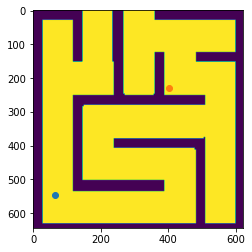

In [27]:
plt.imshow(world)
plt.scatter(startPoint[0],-startPoint[1]+thinned.shape[0])
plt.scatter(endPoint[0],-endPoint[1]+thinned.shape[0])
plt.show() 

**BFS Shortest Path**


In [12]:
def BFS_SP(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            neighbours = graph[node]
             
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return new_path
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    print("So sorry, but a connecting"\
                "path doesn't exist :(")
    return

In [13]:
a = BFS_SP(tree, str(startPoint), str(endPoint))
b = [i[1:-1] for i in a]
b = [[int(i.split(", ")[0]) ,int(i.split(", ")[1])] for i in b]
waypointsFinal = b

KeyError: ignored

In [14]:
len(waypointsFinal)

NameError: ignored

NameError: ignored

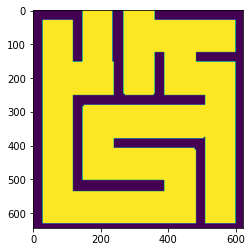

In [15]:
#image = cv2.UMat.get(cv2.circle(world, (thinned.shape[0]-start[1],start[0]), radius=20,color=(0, 0, 255), thickness=-1))
plt.imshow(world)
for i in range(len(waypointsFinal)):
  plt.scatter(waypointsFinal[i][0],-waypointsFinal[i][1]+thinned.shape[0])
plt.show() 

In [ ]:
plt.figure()
video = []
for i in range(0,len(waypointsFinal),10):
  image = cv2.UMat.get(cv2.circle(world, (waypointsFinal[i][0],-waypointsFinal[i][1]+thinned.shape[0]), radius=10,color=(0, 0, 255), thickness=-1))
  plt.imshow(image,cmap='gray')
  #plt.show()
  plt.imsave('/content/maze1/'+str(i)+'.png',image,cmap='gray')
  plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
!zip -r /content/maze1.zip /content/maze1

  adding: content/maze1/ (stored 0%)
  adding: content/maze1/440.png (deflated 76%)
  adding: content/maze1/110.png (deflated 74%)
  adding: content/maze1/590.png (deflated 76%)
  adding: content/maze1/580.png (deflated 76%)
  adding: content/maze1/170.png (deflated 75%)
  adding: content/maze1/200.png (deflated 75%)
  adding: content/maze1/80.png (deflated 75%)
  adding: content/maze1/550.png (deflated 76%)
  adding: content/maze1/280.png (deflated 76%)
  adding: content/maze1/180.png (deflated 76%)
  adding: content/maze1/20.png (deflated 75%)
  adding: content/maze1/150.png (deflated 75%)
  adding: content/maze1/490.png (deflated 76%)
  adding: content/maze1/350.png (deflated 76%)
  adding: content/maze1/530.png (deflated 76%)
  adding: content/maze1/240.png (deflated 76%)
  adding: content/maze1/620.png (deflated 77%)
  adding: content/maze1/520.png (deflated 75%)
  adding: content/maze1/470.png (deflated 76%)
  adding: content/maze1/570.png (deflated 76%)
  adding: content/maze1/3